In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [40]:
Income = 200
Pas = [10.5, 12.5, 15.5, 20]
Pb = 40
Qa = np.arange(0,21,0.5)
Qb = [((Income)/(Pb)) - ((Pa*Qa)/(Pb)) for Pa in Pas]
df = pd.DataFrame(list(zip(Qa,Qb[0],Qb[1],Qb[2],Qb[3])), 
                  columns=['Quantity of Product A'] + 
                          ['Quantity of Product B at Price A = {}'.format(Pa) for Pa in Pas])
print(df)

    Quantity of Product A  Quantity of Product B at Price A = 10.5  \
0                     0.0                                  5.00000   
1                     0.5                                  4.86875   
2                     1.0                                  4.73750   
3                     1.5                                  4.60625   
4                     2.0                                  4.47500   
5                     2.5                                  4.34375   
6                     3.0                                  4.21250   
7                     3.5                                  4.08125   
8                     4.0                                  3.95000   
9                     4.5                                  3.81875   
10                    5.0                                  3.68750   
11                    5.5                                  3.55625   
12                    6.0                                  3.42500   
13                  

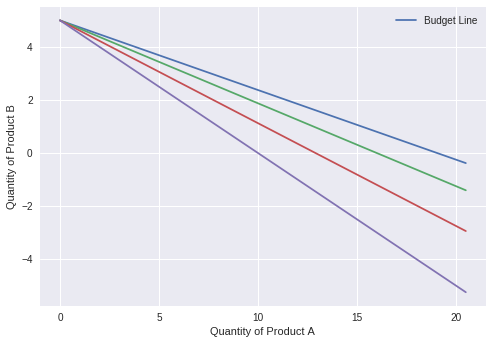

In [41]:
[plt.plot(df['Quantity of Product A'], df['Quantity of Product B at Price A = {}'.format(Pa)]) for Pa in Pas]
plt.xlabel('Quantity of Product A')
plt.ylabel('Quantity of Product B')
plt.legend(['Budget Line'])
plt.show()

In [42]:
x = np.arange(1, 20.1, 0.1)
indifference_curve = lambda x: 25/(2*x)
for Pa in Pas:
    df['Indifference Curve at Pa = {}'.format(Pa)] = indifference_curve(df['Quantity of Product B at Price A = {}'.format(Pa)])
print(df)

    Quantity of Product A  Quantity of Product B at Price A = 10.5  \
0                     0.0                                  5.00000   
1                     0.5                                  4.86875   
2                     1.0                                  4.73750   
3                     1.5                                  4.60625   
4                     2.0                                  4.47500   
5                     2.5                                  4.34375   
6                     3.0                                  4.21250   
7                     3.5                                  4.08125   
8                     4.0                                  3.95000   
9                     4.5                                  3.81875   
10                    5.0                                  3.68750   
11                    5.5                                  3.55625   
12                    6.0                                  3.42500   
13                  

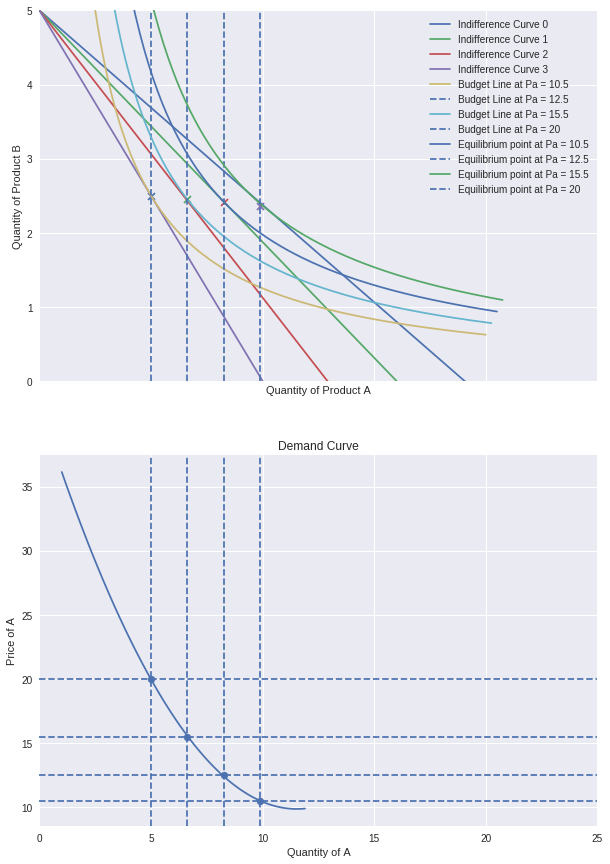

In [83]:
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,15))
for Pa in Pas:
    ax[0].plot(df['Quantity of Product A'], df['Quantity of Product B at Price A = {}'.format(Pa)])
for i in np.arange(1,2,0.25):
    ax[0].plot(x+i-1, i*indifference_curve(x))
    ax[0].scatter([5+6.5*(i-1)],indifference_curve(5)-(i-1)/5.5, marker='x')
    ax[0].axvline([5+6.5*(i-1)],0,indifference_curve(5)-(i-1)/5.5, linestyle='dashed')
    ax[1].axvline([5+6.5*(i-1)],0,indifference_curve(5)-(i-1)/5.5, linestyle='dashed')
ax[0].set_xlabel('Quantity of Product A')
ax[0].set_ylabel('Quantity of Product B')
ax[0].set_ylim(0, 5)
ax[0].set_xlim(0, 20)
ax[0].legend(['Indifference Curve {}'.format(i) for i in range(4)] + 
             ['Budget Line at Pa = {}'.format(Pa) for Pa in Pas] + 
             ['Equilibrium point at Pa = {}'.format(Pa) for Pa in Pas])

ax[1].scatter([5+6.5*(i-1) for i in np.arange(1,2,0.25)],Pas[::-1])
for Pa in Pas:
  ax[1].axhline(Pa, linestyle='dashed')
values = np.polyfit([5+6.5*(i-1) for i in np.arange(1,2,0.25)],Pas[::-1], deg=2)
ax[1].plot(x[:110], values[2] + x[:110]*values[1] + (x[:110]**2)*values[0])
ax[1].set_xlim(0,11)
ax[1].set_xlim(0,25)
ax[1].set_title('Demand Curve')
ax[1].set_xlabel('Quantity of A')
ax[1].set_ylabel('Price of A')

plt.show()